# MAS291 - Project

## Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [52]:

df = pd.read_csv('./data/project_data/Sleep_Stress.csv')

In [53]:
df

,ID,Gender,SleepDuration,StressLevel
0,1,Male,6.1,6
1,2,Male,6.2,8
2,3,Male,6.2,8
3,4,Male,5.9,8
4,5,Male,5.9,8
...,...,...,...,...
369,370,Female,8.1,3
370,371,Female,8.0,3
371,372,Female,8.1,3
372,373,Female,8.1,3


In [54]:
df[['SleepDuration', 'StressLevel']].describe()

,SleepDuration,StressLevel
count,374.000000,374.000000
mean,7.132086,5.385027
std,0.795657,1.774526
min,5.800000,3.000000
25%,6.400000,4.000000
50%,7.200000,5.000000
75%,7.800000,7.000000
max,8.500000,8.000000


## Solving Problems

### Question 1.1: Test a hypothesis and construct a confidence interval for the mean of a population.
Can we conclude that the average sleep duration is 7 hours?

In [55]:
sleep_duration = df['SleepDuration'][:10]
sleep_duration

0    6.1
1    6.2
2    6.2
3    5.9
4    5.9
5    5.9
6    6.3
7    7.8
8    7.8
9    7.8
Name: SleepDuration, dtype: float64

In [56]:
sample_size = len(sleep_duration)

sample_mean = round(sum(sleep_duration) / sample_size,3)

squared_diff_sum = sum([(x - sample_mean) ** 2 for x in sleep_duration])
sample_variance = squared_diff_sum / (sample_size - 1)
sample_std = round(math.sqrt(sample_variance),3)
print('n:', sample_size)
print('x:', sample_mean)
print('s^2:', round(sample_variance, 3))
print('s:', sample_std)

n: 10
x: 6.59
s^2: 0.717
s: 0.846


$
\overline{x} = \frac{6.1 + 6.2 + 6.2 + 5.9 + 5.9 + 5.9 + 6.3 + 7.8 + 7.8 + 7.8}{10} \approx 6.59
$

$
s^2 = \frac{(6.1 - \overline{x})^2 + (6.2 - \overline{x})^2 + (6.2 - \overline{x})^2 + (5.9 - \overline{x})^2 + (5.9 - \overline{x})^2 + (5.9 - \overline{x})^2 + (6.3 - \overline{x})^2 + (7.8 - \overline{x})^2 + (7.8 - \overline{x})^2 + (7.8 - \overline{x})^2}{10-1}\approx 0.717 \Rightarrow s \approx 0.846
$

In [57]:
t = (sample_mean-7)/(sample_std/math.sqrt(sample_size))
t

-1.5325459109563073

We have test statistics:

$
T_0 = \frac{\overline{X} - \mu_0}{s / \sqrt{n}} = \frac{6.59 - 7}{0.846 / \sqrt{10}} \approx -1.532
$


${\alpha = 1-0.95, \text{df} = 9}$ $\Rightarrow t_{\alpha, n-1} = t_{0.05, 9} \approx 1.833$


Since the value $T_{0} = -1,532$ < $t_{\alpha, n-1} = 1,833$, we fail to reject the hypothesis $H_{0}$ with a significance level of 0.05. 

The 95% confident interval: \
$\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$

$6.59 \pm 1.833 \cdot \frac{0.846}{\sqrt{10}}$

$(6.09,7.08)$

The 95% confidence interval for the population mean shows that the population mean sleep time ranges from 6.09 to 7.08 hours.

### Question 1.2: Test a hypothesis and construct a confidence interval for the propotion of a population.

Is there the proportion of people with sleep duration > 7 hours is higher than 50%

$H_0$: p = 0.5

$H_1$: p > 0.5

In [58]:
sample_df = df.sample(n=100, random_state=113)
n = len(sample_df)
n

100

In [59]:
x = sample_df[sample_df['SleepDuration'] > 7].shape[0]
x

60

In [60]:
p = x / n
p

0.6

In [61]:
z = (p - 0.5) / math.sqrt((0.5 * (1 - 0.5)) / n)
z 

1.9999999999999996

Compare the z-value to the critical z-value $z_{\alpha/2} \approx 1.645$ for a significance level $\alpha = 0.05$.  Since z-value is greater than 1.645 so we reject $H_0$

Therefore, there is sufficient evidence to conclude that the proportion of people with sleep duration > 7 hours is higher than 50%

With $\alpha = 0.05$, we have $z_{\alpha/2} \approx 1.96$

Confidence Interval:

$CI = \hat{p} \pm z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ 

$CI \approx (0.5, 0.69)$


### Question 2.1: Test a hypothesis and construct a confidence interval for the difference in mean of two populations.
Is there a significant difference in the mean stress level greater than 6 between males and females?

In [62]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

Suppose we have:
- $n_1$: 15 males have Stresslevel > 6
- $n_2$: 15 females have Stresslevel > 6

In [63]:
n1 = male_df[male_df['StressLevel'] > 6].sample(n=15, random_state=113)
n1

,ID,Gender,SleepDuration,StressLevel
219,220,Male,6.5,7
58,59,Male,6.0,8
36,37,Male,6.1,8
233,234,Male,6.3,7
75,76,Male,6.0,8
192,193,Male,6.5,7
64,65,Male,6.2,8
247,248,Male,6.8,7
72,73,Male,6.1,8
147,148,Male,6.5,7


In [64]:
n2=female_df[female_df['StressLevel'] > 6].sample(n=15, random_state=113)
n2

,ID,Gender,SleepDuration,StressLevel
273,274,Female,6.2,8
297,298,Female,6.1,8
16,17,Female,6.5,7
304,305,Female,6.1,8
184,185,Female,6.8,7
270,271,Female,6.1,8
271,272,Female,6.1,8
308,309,Female,6.6,7
288,289,Female,6.0,8
267,268,Female,6.2,8


##### Hypothesis Testing
- $H_0: µ_1 - µ_2 = Δ_0$
- $H_1: µ_1-µ_2 \ne Δ_0$

Find mean and sample variance

Mean:
$$ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $$
Sample Variance:
$$ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

In [65]:
# Calculate mean and variance for each sample
male_mean = round(n1['SleepDuration'].mean(), 2)
male_s = round(n1['SleepDuration'].var(ddof=1), 2) 
female_mean = round(n2['SleepDuration'].mean(), 2)
female_s = round(n2['SleepDuration'].var(ddof=1), 2)

male_mean, male_s, female_mean, female_s

(6.29, 0.06, 6.2, 0.06)

Find pooled variance:
$$ s_p = \sqrt{\frac{{s_{1}^2 \cdot (n_{1}-1) + s_{2}^2 \cdot (n_{2}-1)}}{{n_{1} + n_{2} - 2}}} $$

In [66]:
pooled_se = np.sqrt((male_s**2*(len(n1['SleepDuration'])-1) + female_s**2*(len(n2['SleepDuration'])-1)) / (len(n1['SleepDuration'])+len(n2['SleepDuration'])-2))
pooled_se = round(pooled_se, 2)

pooled_se

0.06

Test statistic:
$$ t_0 = \frac{{\bar{x}_{1} - \bar{x}_{2}-\Delta_0}}{{s_{\text{p}} \cdot \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}} $$

In [67]:
t_stat = (male_mean - female_mean) / ((pooled_se*np.sqrt(1/len(n1['SleepDuration']) + 1/len(n2['SleepDuration']))))
t_stat = t_stat.round(2)

t_stat

4.11

We have: $ t_\text{α/2,df} = t_\text{0.025,28} = 2.048 $ ( with df= $n_1+n_2-2$).

Since $t_0$ > 2.048. Therefore, we reject the null hypothesis $H_0$. There is a significant difference in the mean sleep duration between males and females with
stress level > 6.


##### Construct a 95% confidence interval

The 95% confidence interval for the difference in mean between the two populations is calculated as:

$\bar{x}_1 - \bar{x}_2 - t_{\alpha/2,df} \cdot \sqrt{\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2}} \leq \mu_1 - \mu_2 \leq \bar{x}_1 - \bar{x}_2 + t_{\alpha/2,df} \cdot \sqrt{\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2}}$

In [68]:
interval= [male_mean - female_mean - 2.048*np.sqrt(1/len(n1['StressLevel']) + 1/len(n2['StressLevel'])), male_mean - female_mean + 2.048*np.sqrt(1/len(n1['StressLevel']) + 1/len(n2['StressLevel']))]
interval = round(interval[0], 2), round(interval[1], 2)
interval

(-0.66, 0.84)

### Question 2.2: Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.
The difference in the proportion of people with StressLevel > 6 between males and females

Suppose we have:
- n1: Total number of males
- n2: Total number of females
- x1: Number of males with StressLevel > 6
- x2: Number of females with StressLevel > 6

In [69]:
male_df = df[df['Gender']=='Male'].sample(n=60, random_state=113)
female_df = df[df['Gender']=='Female'].sample(n=50, random_state=113)
n1 = male_df.shape[0]
n2 = female_df.shape[0]
print('n1:', n1)
print('n2:', n2)

n1: 60
n2: 50


In [70]:
highst_male = male_df[male_df['StressLevel']>6]
highst_female = female_df[female_df['StressLevel']>6]
x1 = highst_male.shape[0]
x2 = highst_female.shape[0]
print('x1:', x1)
print('x2:', x2)

x1: 24
x2: 15


The proportion of people with StressLevel > 6 for each gender is calculated as follows: \
$\hat{p_1} = \frac{x_1}{n_1} = \frac{74}{189} \approx 0.392 $ \
$\hat{p_2} = \frac{x_2}{n_2} = \frac{46}{185} \approx 0.249 $ 

- $\hat{p_1}$ is the proportion of people with StressLevel > 6 in the male sample
- $\hat{p_2}$ is the proportion of people with StressLevel > 6 in the female sample

In [71]:
p1 = round(x1/n1, 3)
p2 = round(x2/n2, 3)
print('p1:', p1)
print('p2:', p2)

p1: 0.4
p2: 0.3


Hypothesis Testing
- $H_0: p_1 = p_2$
- $H_1: p_1 \ne p_2$

Calculate $\hat{p}$: \
$\hat{p} = \frac{x_1 + x_2}{n_1 + n_2} = \frac{74+46}{189+185} \approx 0.321$

- $\hat{p}$ is the pooled proportion estimate from both samples

In [72]:
p = round((x1+x2)/(n1+n2), 3)
p

0.355

Calculate z-value :
$z = \frac{\hat{p_1}-\hat{p_2}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} = \frac{0.392-0.249}{\sqrt{0.321(1-0.321)(\frac{1}{189}+\frac{1}{185})}} \approx 2.962$

In [73]:
z = round((p1-p2)/(math.sqrt(p*(1-p)*(1/n1 + 1/n2))), 3)
z

1.091

In [74]:
interval = [
    (p1 - p2) - 1.96 * np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)),
    (p1 - p2) + 1.96 * np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
]

interval = round(interval[0], 4), round(interval[1], 4)
interval

(-0.0775, 0.2775)

Compare the z-value to the critical z-value $z_{\alpha/2} \approx 1.96$ for a significance leval $\alpha = 0.05$. Since our z-value is greater than 1.96, we reject the null hypothesis $H_0$|

Construct a 95% Confidence Interval

The 95% confidence interval for the difference in proportions between the two populations is calculated as: \
$(\hat{p_1} - \hat{p_2}) \pm z_{\alpha/2} \times \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$ 


$(-0.077,0.277)$

### Question 3: Regression analysis

### Create scatter diagram 
- Random variable X = Sleep Duration and Y = Stress level

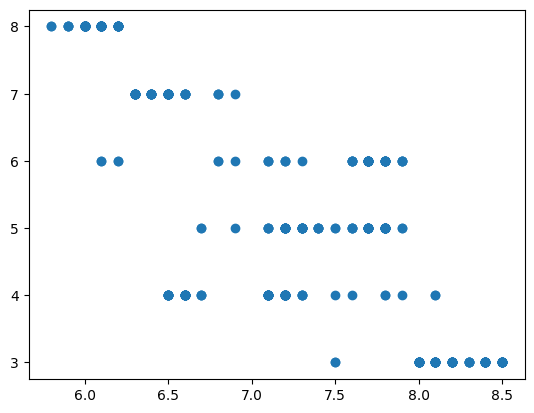

In [75]:
plt.scatter(y=df['StressLevel'],x=df['SleepDuration'])

In [76]:
X=df[['SleepDuration']]
Y=df['StressLevel']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9112359882288522
R-squared: 0.7083360399574772


In [77]:
# Predict a future value (e.g., for sleep_duration = 9.2)
future_sleep_duration = 9.2
predicted_stress_level = model.predict([[future_sleep_duration]])
print(f'Predicted Stress Level for Sleep Duration of {future_sleep_duration}: {predicted_stress_level[0]}')

Predicted Stress Level for Sleep Duration of 9.2: 1.6396669306121687


In [78]:
#Khoi tao tham so theta, alpha, epslk
def gradient_descent(X,Y,learning_rate=0.01,iterations=15000):
  m = X.shape[0]
  theta = np.zeros(2)
  X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

  for iteration in range(iterations):
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
      theta = theta - learning_rate * gradients

  return theta

### Best fit line train by all data

Best fit line: y = -1.7405938644426449X + 17.793168340641966


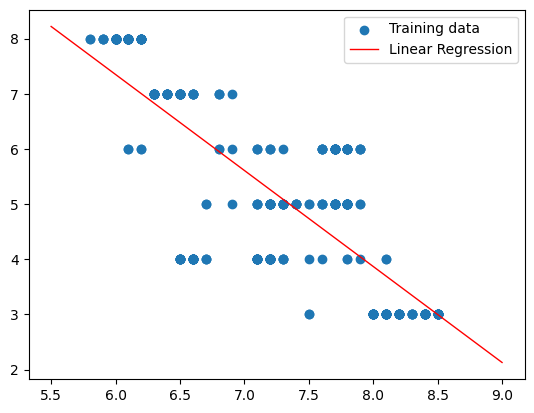

In [79]:
x_vis = np.array([5.5,9])
X = np.array(df['SleepDuration'])
Y = np.array(df['StressLevel'])
theta = gradient_descent(X, Y)
y_vis = theta[1]*x_vis + theta[0]
print(f"Best fit line: y = {theta[1]}X + {theta[0]}")
plt.scatter(X,Y,label='Training data')
plt.plot(x_vis, y_vis,color='red',linewidth=1,linestyle='-',label='Linear Regression')
plt.legend(loc='best')
plt.show()

### Sampling to test

In [80]:
st = df[['SleepDuration','StressLevel']].sample(n=40,random_state=42) 
st

,SleepDuration,StressLevel
329,8.5,3
33,6.1,8
15,6.0,8
325,8.5,3
57,6.0,8
239,6.4,7
76,6.0,8
119,7.2,4
332,8.4,3
126,7.3,5


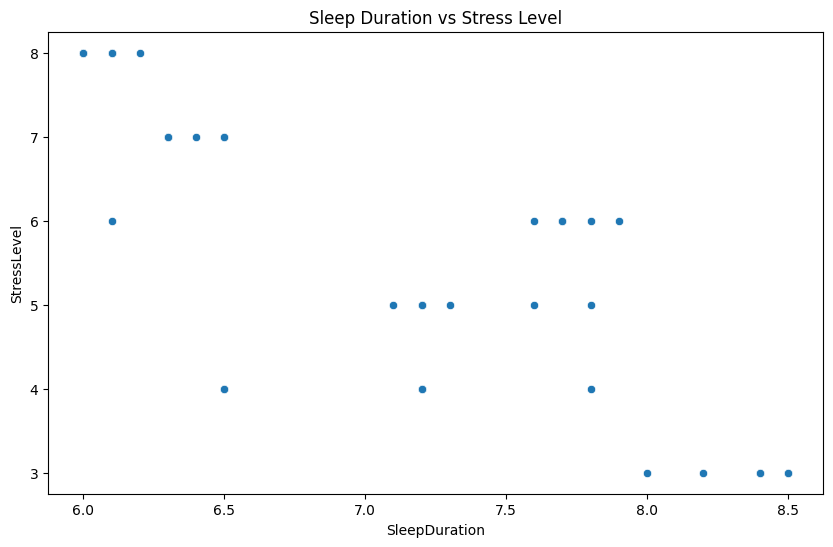

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SleepDuration',y='StressLevel',data=st)
plt.title('Sleep Duration vs Stress Level')
plt.show()

In [82]:
correlation = np.corrcoef(st['SleepDuration'], st['StressLevel'])[0, 1]
print(f'Sample Correlation Coefficient: {correlation}')

Sample Correlation Coefficient: -0.8196449262336195


In [83]:
# Reshape data for sklearn
X = st['SleepDuration'].values
Y = st['StressLevel'].values

theta = gradient_descent(X, Y)

# Get the parameters
slope = theta[1]
intercept = theta[0]
print(f'Regression Line: Y = {slope}X + {intercept}')

Regression Line: Y = -1.6928253302846943X + 17.57968452480253


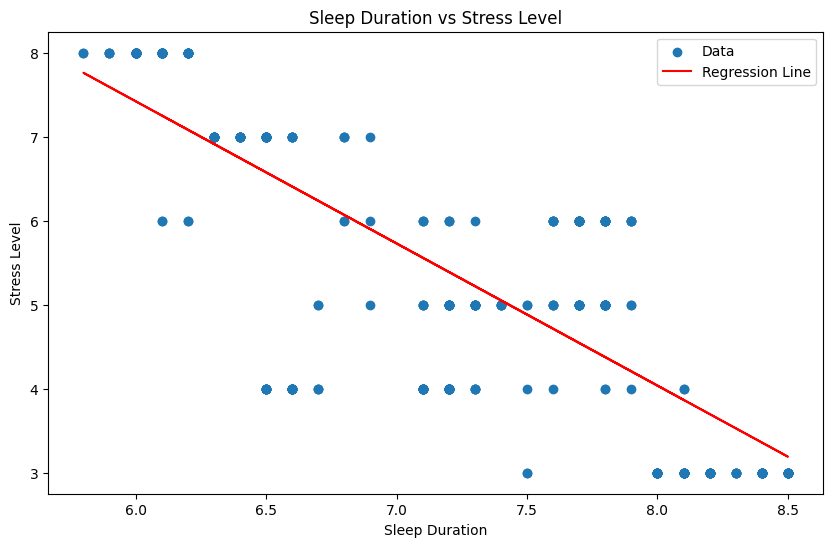

In [87]:
# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Data')
plt.plot(X, slope*X + intercept, color='red', label='Regression Line') 
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Sleep Duration vs Stress Level')
plt.legend()
plt.show()

### Sample Correlation Coefficient
The sample correlation coefficient is calculated as follows:
$$
r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}
$$
Using the provided data, the sample correlation coefficient is:
$$
r \approx -0.819
$$

### Estimated Regression Line
The estimated regression line is found using the linear regression model:
$$
Y = \beta_0 + \beta_1 X
$$
Where:
$$
\beta_1 = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sum{(X_i - \bar{X})^2}}
$$
$$
\beta_0 = \bar{Y} - \beta_1 \bar{X}
$$
Using the provided data, the estimated regression line is:
$$
\hat{Y} = -1.692X + 17.579
$$


### Evalution
#### Compare with linear regression model from sklearn

In [85]:
# Using sklearn
model = LinearRegression()
X = st['SleepDuration'].values.reshape(-1,1)
Y = st['StressLevel'].values
model.fit(X, Y)
beta_1_sklearn = model.coef_[0]
beta_0_sklearn = model.intercept_

# Printing the results
print(f"Manual calculation - Slope: {theta[1]}, Intercept: {theta[0]}")
print(f"Sklearn calculation - Slope: {beta_1_sklearn}, Intercept: {beta_0_sklearn}")

# Comparison
comparison = {
    "Manual Slope": theta[1],
    "sklearn Slope": beta_1_sklearn,
    "Manual Intercept": theta[0],
    "sklearn Intercept": beta_0_sklearn
}

print(comparison)

Manual calculation - Slope: -1.6928253302846943, Intercept: 17.57968452480253
Sklearn calculation - Slope: -1.7384852149060137, Intercept: 17.905243486863807
{'Manual Slope': -1.6928253302846943, 'sklearn Slope': -1.7384852149060137, 'Manual Intercept': 17.57968452480253, 'sklearn Intercept': 17.905243486863807}


In [86]:
X=df[['SleepDuration']]
Y=df['StressLevel']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
theta = gradient_descent(np.array(X_train), np.array(Y_train))
Y_pred= theta[0] + theta[1] * X_test
# Create a DataFrame for comparison
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred['SleepDuration']})
print(predictions)

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
accuracy_percentage = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Model Accuracy: {accuracy_percentage:.2f}%')



     Actual  Predicted
329       3   2.989984
33        8   7.124100
15        8   7.296355
325       3   2.989984
57        8   7.296355
..      ...        ...
94        4   5.229297
195       7   6.435081
312       3   3.162239
292       8   7.124100
372       3   3.679004

[75 rows x 2 columns]
Mean Squared Error: 0.9233445984906291
R-squared: 0.7044603751843752
Model Accuracy: 70.45%
